In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,precision_score, recall_score

In [25]:
hr=pd.read_csv('Hotel Reservations.csv')
hr.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [26]:
hr.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
hr.shape

(36275, 19)

In [28]:
# Check for null values
missing_data = hr.isnull().sum()
missing_data

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [29]:
# Number of distinct values in each column
hr.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [30]:
cols1=['no_of_adults','no_of_children','type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type','repeated_guest','booking_status']
d = {}
for c in cols1:
    d[c] = hr[c].unique()
d

{'no_of_adults': array([2, 1, 3, 0, 4]),
 'no_of_children': array([ 0,  2,  1,  3, 10,  9]),
 'type_of_meal_plan': array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
       dtype=object),
 'required_car_parking_space': array([0, 1]),
 'room_type_reserved': array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
        'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object),
 'market_segment_type': array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
       dtype=object),
 'repeated_guest': array([0, 1]),
 'booking_status': array(['Not_Canceled', 'Canceled'], dtype=object)}

In [31]:
# Feature Engineering
# summary stats for each variable
cols=['lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_weekend_nights','no_of_week_nights']
summary = hr[cols].describe()

# Display the summary
summary

,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_weekend_nights,no_of_week_nights
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,85.232557,0.023349,0.153411,103.423539,0.810724,2.204300
std,85.930817,0.368331,1.754171,35.089424,0.870644,1.410905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,80.300000,0.000000,1.000000
50%,57.000000,0.000000,0.000000,99.450000,1.000000,2.000000
75%,126.000000,0.000000,0.000000,120.000000,2.000000,3.000000
max,443.000000,13.000000,58.000000,540.000000,7.000000,17.000000


In [32]:
# Average price per room cannot be zero
# Remove those rows
hr=hr[hr['avg_price_per_room']>0]

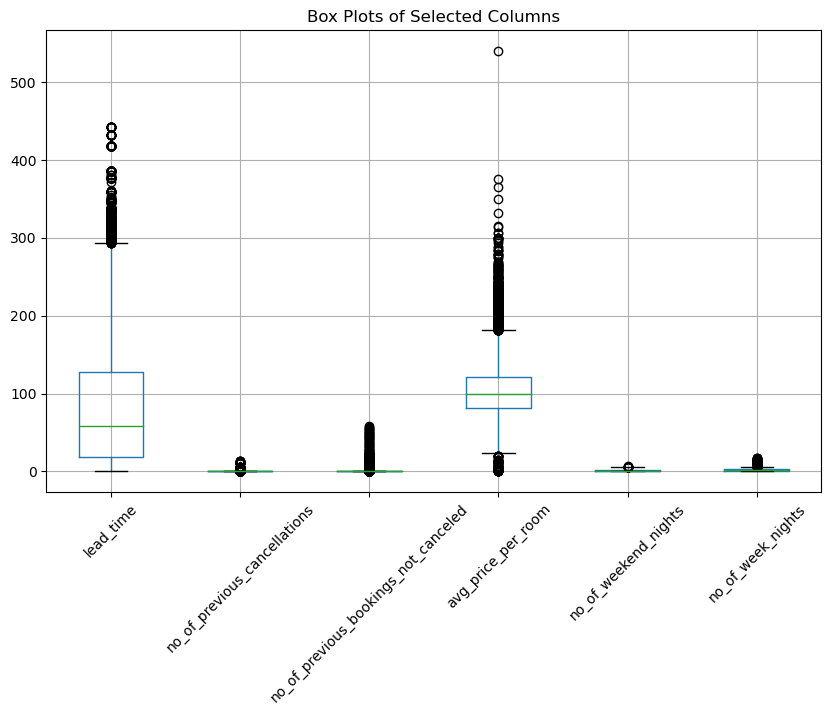

In [33]:
# Create box plots for the specified columns
plt.figure(figsize=(10, 6))
hr[cols].boxplot()
plt.title('Box Plots of Selected Columns')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Looks like lead time, no of previous bookings not cancelled, average price per room have outliers

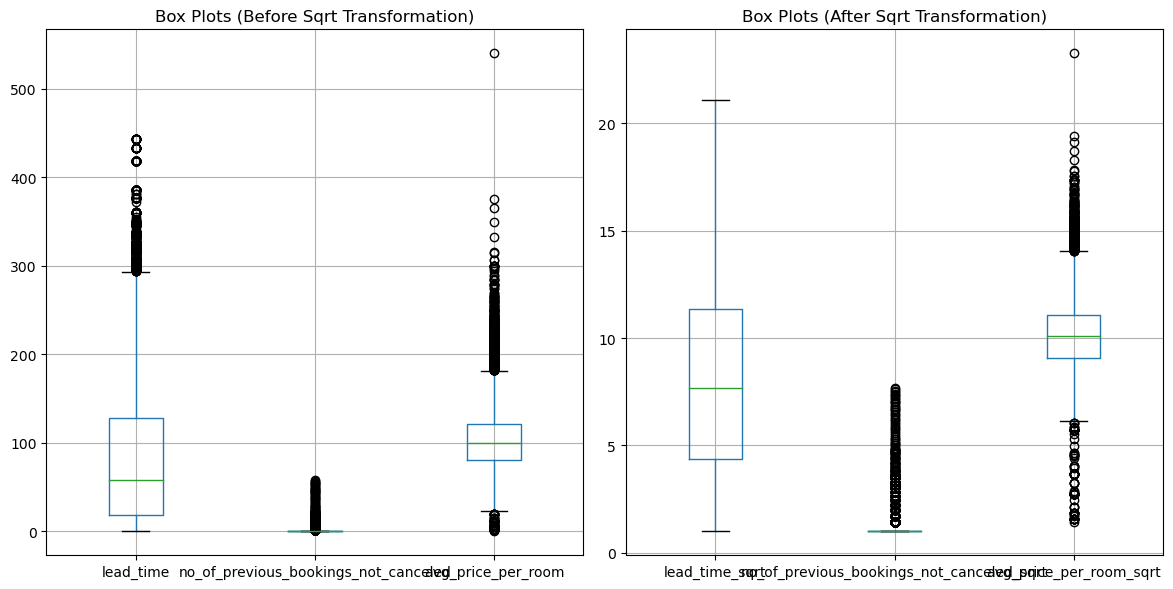

Number of Outliers (Before Sqrt Transformation):
lead_time                               1184
no_of_previous_bookings_not_canceled     690
avg_price_per_room                      1101
dtype: int64

Number of Outliers (After Sqrt Transformation):
lead_time_sqrt                                 0
no_of_previous_bookings_not_canceled_sqrt    690
avg_price_per_room_sqrt                      711
dtype: int64


In [35]:
# Columns with outliers 
outlier_cols = ['lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']

# Function to count outliers using IQR method
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].count()

# Count outliers before sqrt transformation
outliers_before = hr[outlier_cols].apply(count_outliers)

# Apply sqrt transformation with an offset to each column
for col in outlier_cols:
    offset = hr[col].min() + 1  # Add 1 or a small positive value to handle zeros
    hr[f'{col}_sqrt'] = np.sqrt(hr[col] + offset)

# Count outliers after sqrt transformation
outliers_after = hr[[f'{col}_sqrt' for col in outlier_cols]].apply(count_outliers)

# Plot box plots before and after sqrt transformation
plt.figure(figsize=(12, 6))

# Before sqrt transformation
plt.subplot(1, 2, 1)
hr[outlier_cols].boxplot()
plt.title('Box Plots (Before Sqrt Transformation)')

# After sqrt transformation
plt.subplot(1, 2, 2)
hr[[f'{col}_sqrt' for col in outlier_cols]].boxplot()
plt.title('Box Plots (After Sqrt Transformation)')

plt.tight_layout()
plt.show()

# Display the number of outliers before and after transformation
print("Number of Outliers (Before Sqrt Transformation):")
print(outliers_before)

print("\nNumber of Outliers (After Sqrt Transformation):")
print(outliers_after)

In [36]:
# sqrt worked on lead time but not the others
# Drop the sqrt columns for the other two
hr=hr.drop(columns=['no_of_previous_bookings_not_canceled_sqrt','avg_price_per_room_sqrt'],axis=1)

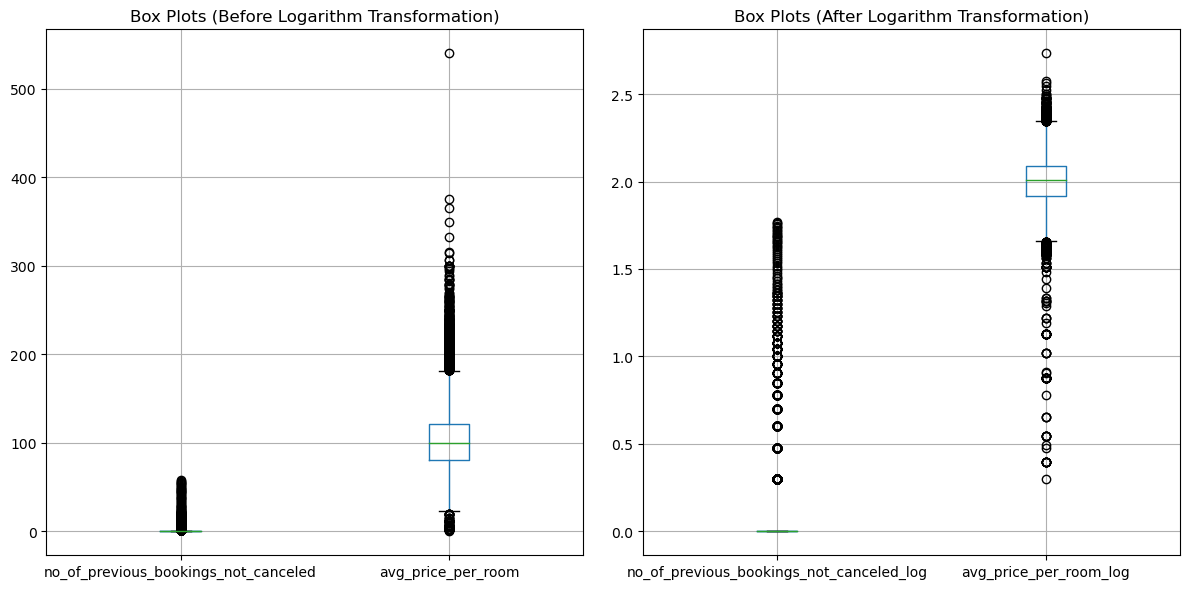

Number of Outliers (Before Logarithm Transformation):
no_of_previous_bookings_not_canceled     690
avg_price_per_room                      1101
dtype: int64

Number of Outliers (After Logarithm Transformation):
no_of_previous_bookings_not_canceled_log    690
avg_price_per_room_log                      451
dtype: int64


In [37]:
outlier_cols_1 = ['no_of_previous_bookings_not_canceled', 'avg_price_per_room']

outliers_before = hr[outlier_cols_1].apply(count_outliers)

# Apply logarithm transformation with an offset to each column
for col in outlier_cols_1:
    offset = hr[col].min() + 1  # Add 1 or a small positive value to handle zeros
    hr[f'{col}_log'] = np.log10(hr[col] + offset)

# Count outliers after logarithm transformation
outliers_after = hr[[f'{col}_log' for col in outlier_cols_1]].apply(count_outliers)

# Plot box plots before and after logarithm transformation
plt.figure(figsize=(12, 6))

# Before logarithm transformation
plt.subplot(1, 2, 1)
hr[outlier_cols_1].boxplot()
plt.title('Box Plots (Before Logarithm Transformation)')

# After logarithm transformation
plt.subplot(1, 2, 2)
hr[[f'{col}_log' for col in outlier_cols_1]].boxplot()
plt.title('Box Plots (After Logarithm Transformation)')

plt.tight_layout()
plt.show()

# Display the number of outliers before and after transformation
print("Number of Outliers (Before Logarithm Transformation):")
print(outliers_before)

print("\nNumber of Outliers (After Logarithm Transformation):")
print(outliers_after)

In [38]:
# The log transformation significantly reduced the outliers for avg_price_per_room_log by ~60% but did not help with no_of_previous_bookings_not_canceled
# Not removing the original avg_price_per_room variable because we need it for EDA
hr=hr.drop(columns=['no_of_previous_bookings_not_canceled_log'],axis=1)

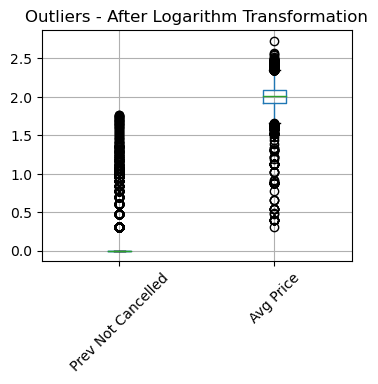

In [39]:
# For Slides
# Columns with outliers 
outlier_cols_1 = ['no_of_previous_bookings_not_canceled', 'avg_price_per_room']

# Apply logarithm transformation with an offset to each column
for col in outlier_cols_1:
    offset = hr[col].min() + 1  # Add 1 or a small positive value to handle zeros
    hr[f'{col}_log'] = np.log10(hr[col] + offset)

# Create box plots for the specified columns after log transformation
plt.figure(figsize=(4, 3))
hr[[f'{col}_log' for col in outlier_cols_1]].boxplot()

# Define custom labels
custom_labels = ['Prev Not Cancelled', 'Avg Price']

# Apply the custom labels
plt.xticks(ticks=np.arange(1, len(outlier_cols_1)+1), labels=custom_labels, rotation=45)

plt.title('Outliers - After Logarithm Transformation')
plt.show()

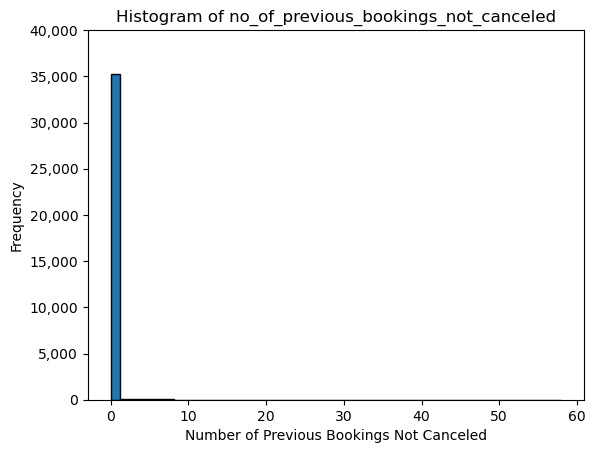

In [40]:
# Plot histogram for 'no_of_previous_bookings_not_canceled'
plt.hist(hr['no_of_previous_bookings_not_canceled'], bins=50, edgecolor='black')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.title('Histogram of no_of_previous_bookings_not_canceled')

# Get current y-axis ticks and labels
yticks, ylabels = plt.yticks()

# Increase the spacing between y-axis ticks and labels
plt.yticks(yticks, [f'{int(y):,}' for y in yticks])

plt.show()

In [41]:
# We will not remove the outliers for this variable because we might be losing valuable data

In [42]:
# Check if data is imbalanced
# Check the class distribution for the 'booking_status' column
booking_status_counts = hr['booking_status'].value_counts()

# Calculate the percentage of each class
total_bookings = len(hr)
class_proportions = booking_status_counts / total_bookings * 100

# Print class distribution
print("Class Distribution:")
print(booking_status_counts)
print("\nClass Proportions (%):")
print(class_proportions)

Class Distribution:
Not_Canceled    23851
Canceled        11879
Name: booking_status, dtype: int64

Class Proportions (%):
Not_Canceled    66.753428
Canceled        33.246572
Name: booking_status, dtype: float64


In [43]:
# The data shows a healthy balance and there is no need for synthetic sampling

In [44]:
# Combine the date columns and convert to datetime
# We need this so we can track bookings over time for EDA
# Remove rows with invalid dates (e.g., February 29 in non-leap years)
hr = hr[~((hr['arrival_month'] == 2) & (hr['arrival_date'] == 29) & ~(hr['arrival_year'] % 4 == 0))]

# Combine 'arrival_year', 'arrival_month', and 'arrival_date' with a custom separator
hr['arrival_date_combined'] = hr['arrival_year'].astype(str) + '-' + hr['arrival_month'].astype(str) + '-' + hr['arrival_date'].astype(str)

# Convert the concatenated date column to a datetime object
hr['arrival_date_combined'] = pd.to_datetime(hr['arrival_date_combined'])

# Drop the original 'arrival_date', 'arrival_month', and 'arrival_year' columns
hr.drop(['arrival_date', 'arrival_month', 'arrival_year'], axis=1, inplace=True)

In [45]:
# Convert 'booking_status' into dummy variables
hr=pd.get_dummies(hr,columns=['booking_status'],drop_first=False)
hr=hr.drop('booking_status_Not_Canceled', axis=1)

In [46]:
# We cannot use the dates as is for features and need to extract day, week, quarter, etc. from it
def feature_engineering_dates(df):
    df['year'] = df['arrival_date_combined'].dt.year
    df['month'] = df['arrival_date_combined'].dt.month
    df['day'] = df['arrival_date_combined'].dt.day
    df['week'] = df['arrival_date_combined'].dt.isocalendar().week.astype(float)
    df['dayofweek'] = df['arrival_date_combined'].dt.dayofweek
    df['quarter'] = df['arrival_date_combined'].dt.quarter
    df['dayofyear'] = df['arrival_date_combined'].dt.dayofyear
    
    return df

# Call the function to create date-related features
hr = feature_engineering_dates(hr)

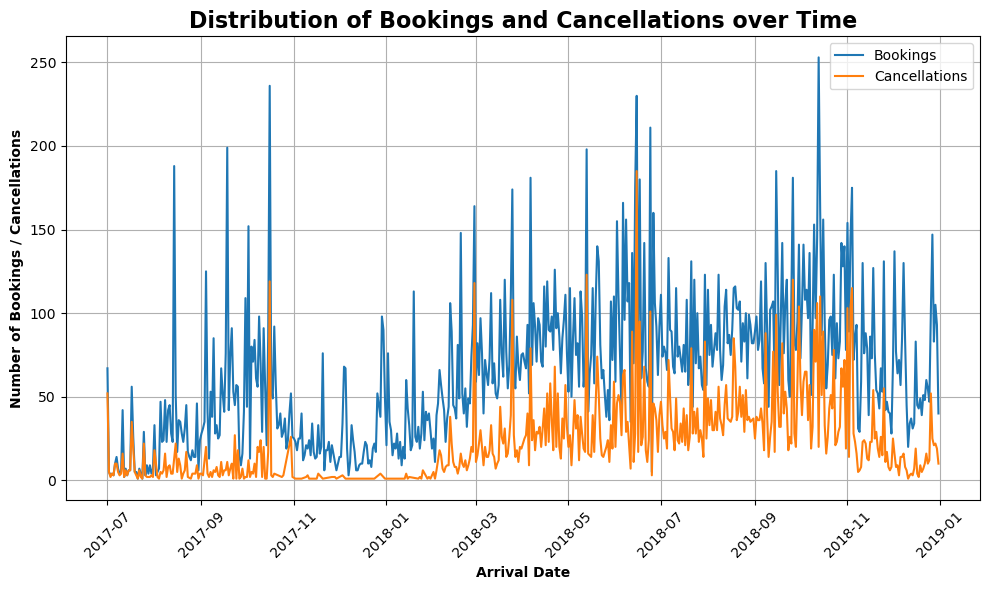

In [49]:
import matplotlib.pyplot as plt

# Group the data by arrival dates and count the total bookings for each date
bookings_by_date = hr.groupby('arrival_date_combined').size()

# Group the data by arrival dates and count the cancellations for each date
cancellations_by_date = hr[hr['booking_status_Canceled'] == 1].groupby('arrival_date_combined').size()

# Plot the distribution of bookings and cancellations over time
plt.figure(figsize=(10, 6))
plt.plot(bookings_by_date.index, bookings_by_date.values, label='Bookings')
plt.plot(cancellations_by_date.index, cancellations_by_date.values, label='Cancellations')
plt.xlabel('Arrival Date', fontdict={'weight': 'bold'})
plt.ylabel('Number of Bookings / Cancellations', fontdict={'weight': 'bold'})
plt.title('Distribution of Bookings and Cancellations over Time', fontdict={'weight': 'bold', 'size': 16})
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # Add some space between title and plot
plt.show()

In [50]:
# Looks like there are mostly bulk bookings and cancellations

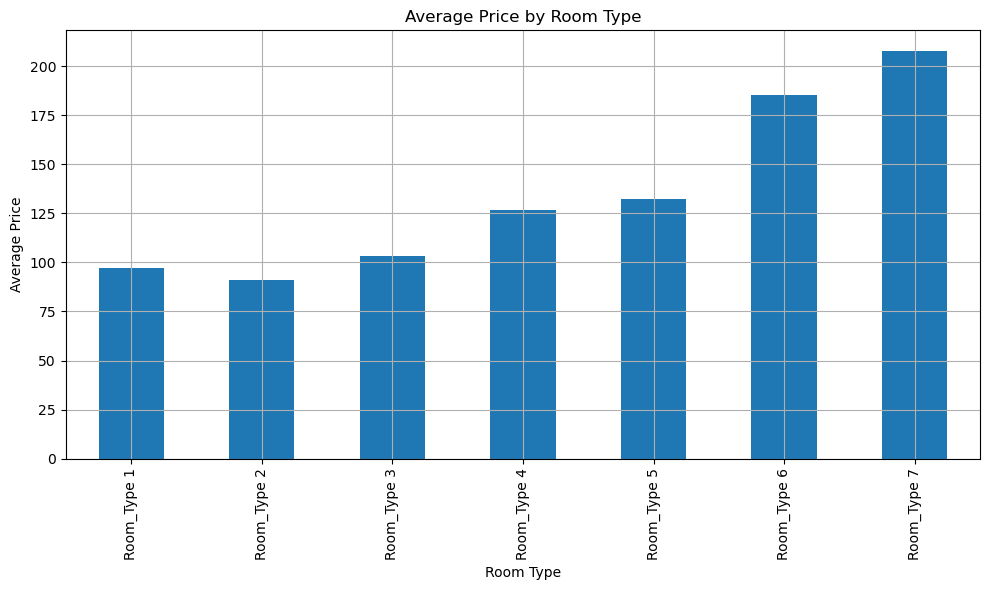

In [51]:
# Group data by 'room_type_reserved' and calculate average price for each group
average_price_by_room_type = hr.groupby('room_type_reserved')['avg_price_per_room'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
average_price_by_room_type.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# What is the profile of the guests making the reservations?
# List of profile features to analyze
profile_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
                    'no_of_adults', 'no_of_children', 'repeated_guest', 'no_of_special_requests','required_car_parking_space',
                   'year','month','day','week','dayofweek','quarter']

# Create a function to display table for each profile feature
def display_tables(feature):
    cancellation_counts = hr.groupby([feature, 'booking_status_Canceled']).size().unstack()

    # Calculate percentages
    cancellation_counts['Total'] = cancellation_counts.sum(axis=1)
    cancellation_counts['Not Canceled %'] = ((cancellation_counts[0] / cancellation_counts['Total'])*100).round(0)
    cancellation_counts['Canceled %'] = ((cancellation_counts[1] / cancellation_counts['Total'])*100).round(0)

    # Display table
    print(f"Table for {feature}:\n")
    print(cancellation_counts)

# Display table for each profile feature
for feature in profile_features:
    display_tables(feature)
    print("\n")

Table for type_of_meal_plan:

booking_status_Canceled        0       1    Total  Not Canceled %  Canceled %
type_of_meal_plan                                                            
Meal Plan 1              18683.0  8669.0  27352.0            68.0        32.0
Meal Plan 2               1739.0  1504.0   3243.0            54.0        46.0
Meal Plan 3                  NaN     1.0      1.0             NaN       100.0
Not Selected              3399.0  1698.0   5097.0            67.0        33.0


Table for room_type_reserved:

booking_status_Canceled      0     1  Total  Not Canceled %  Canceled %
room_type_reserved                                                     
Room_Type 1              18657  9060  27717            67.0        33.0
Room_Type 2                439   228    667            66.0        34.0
Room_Type 3                  3     2      5            60.0        40.0
Room_Type 4               3924  2068   5992            65.0        35.0
Room_Type 5                174    72 

In [53]:
# Insights

# Almost no one chooses meal plan 3. It had one booking and that was cancelled.

# Coporate and Complementary bookings have the lowest cancellation rates

# Repeated guests have much lower cancellations, as do people with special requests and those who need parking

# Cancellation % has more than doubled from 2017 to 2018

# Cancellation % are the lowest in December and January

# Bookings go up consistently from the first to the third quarter

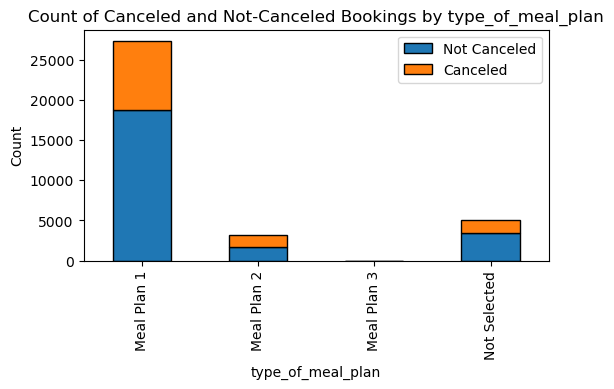

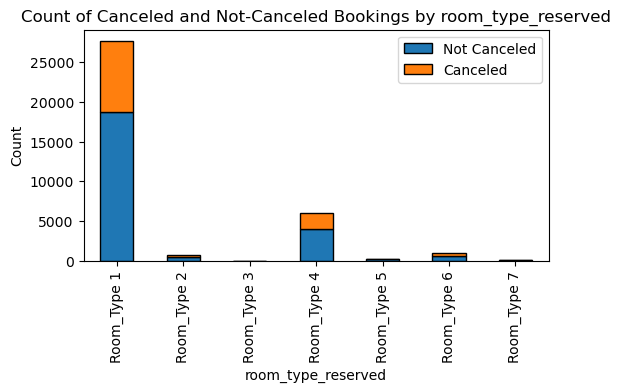

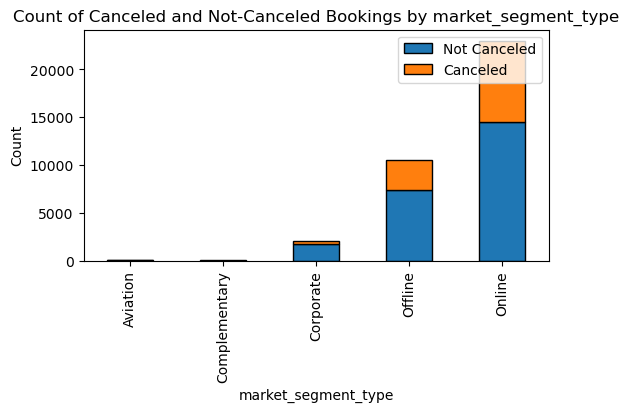

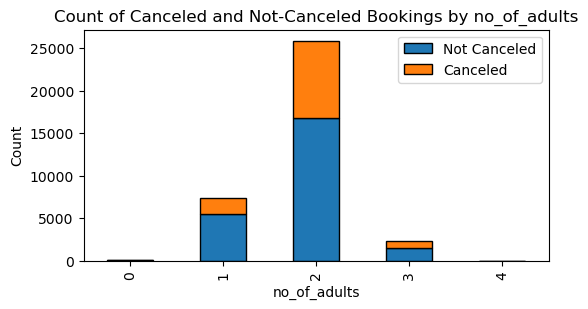

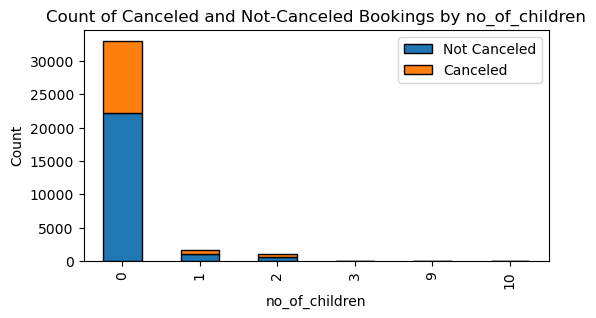

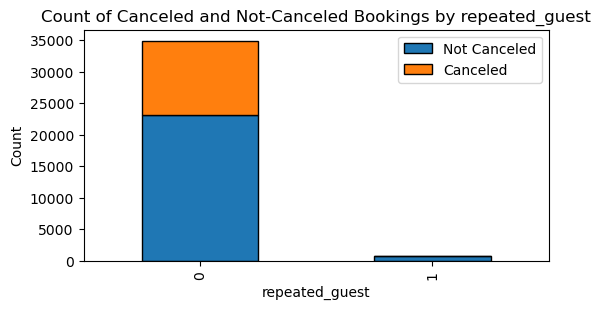

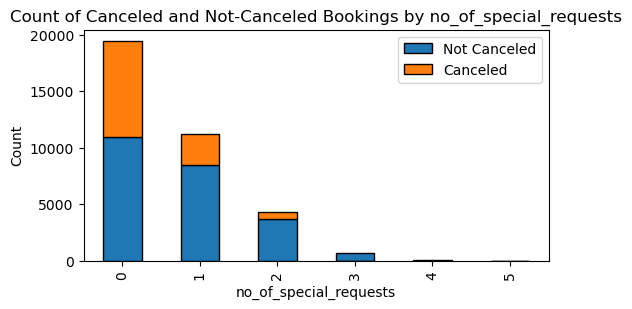

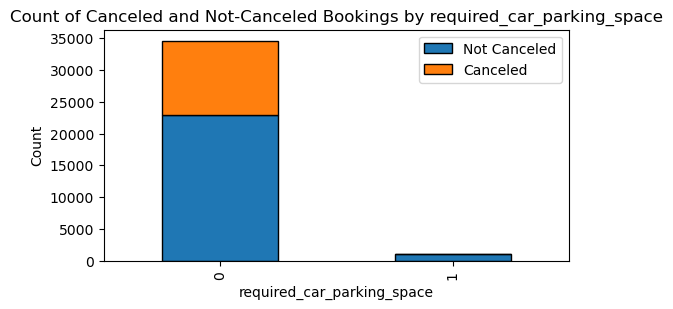

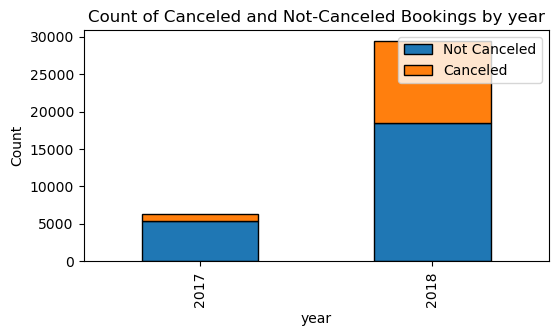

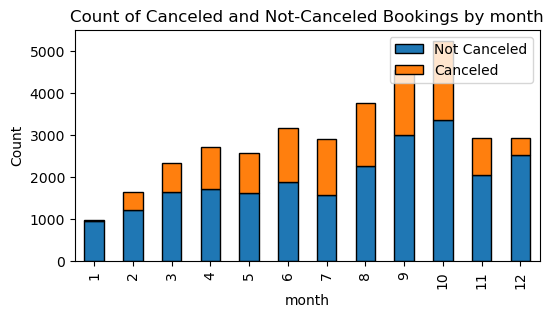

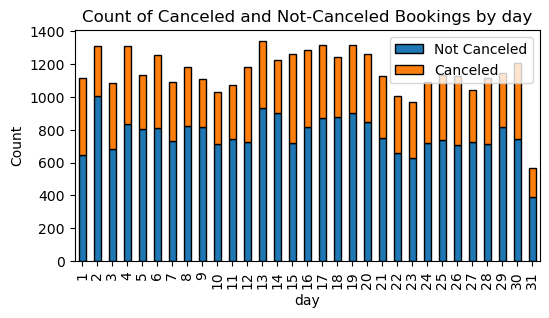

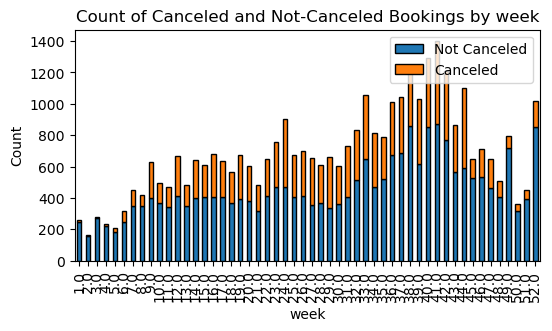

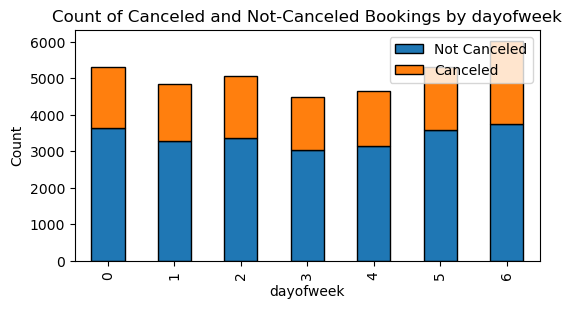

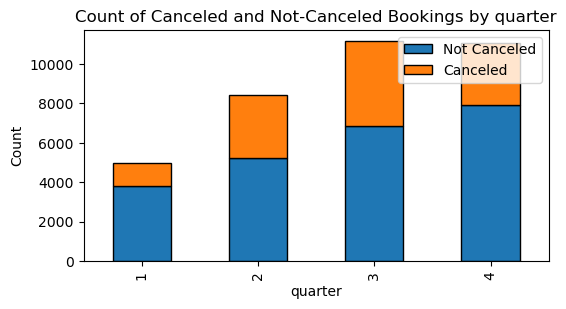

In [55]:
# Create a function to plot stacked bars
def plot_stacked_bars(feature):
    cancellation_counts = hr.groupby([feature, 'booking_status_Canceled']).size().unstack()
    cancellation_counts.plot(kind='bar', stacked=True, edgecolor='black', figsize=(6, 3))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of Canceled and Not-Canceled Bookings by {feature}')
    plt.legend(['Not Canceled', 'Canceled'], loc='upper right')
    plt.show()

# Plot stacked bars for each profile feature
for feature in profile_features:
    plot_stacked_bars(feature)

In [36]:
# Insights

# Longer trips have lower cancellations - Longer trips tend to be more planned

# As we get closer to the trip, cancellations increase

# Cancellations are the lowest for very cheap and very expensive rooms

# Add weekend and week nights

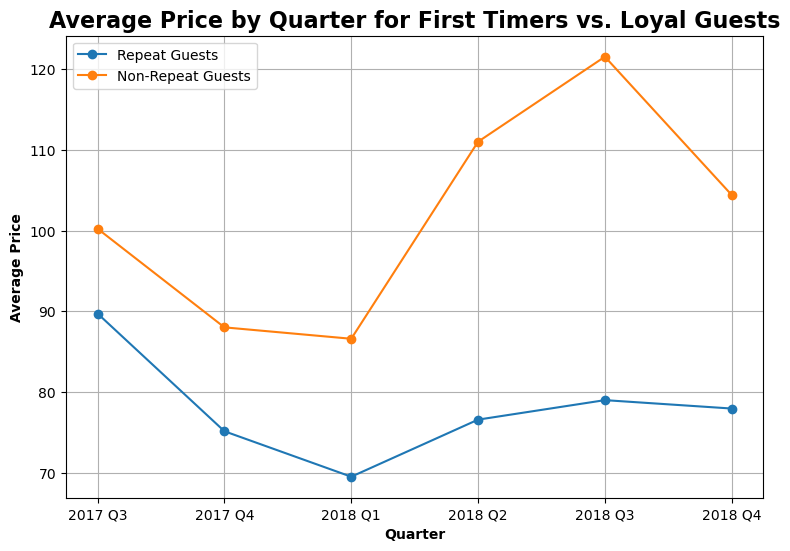

In [57]:
# Create a new column 'quarter_year' combining 'quarter' and 'year'
hr['quarter_year'] = hr['year'].astype(str) + ' Q' +hr['quarter'].astype(str) 

# Separate repeat guests from non-repeat guests
repeat_guests = hr[hr['repeated_guest'] == 1]
non_repeat_guests = hr[hr['repeated_guest'] == 0]

repeat_guests_avg_price=repeat_guests.groupby('quarter_year')['avg_price_per_room'].mean()
non_repeat_guests_avg_price=non_repeat_guests.groupby('quarter_year')['avg_price_per_room'].mean()

# Plot the data
quarters = sorted(hr['quarter_year'].unique())  # Get unique quarters in ascending order
plt.figure(figsize=(9, 6))
plt.plot(quarters, repeat_guests_avg_price, marker='o', label='Repeat Guests')
plt.plot(quarters, non_repeat_guests_avg_price, marker='o', label='Non-Repeat Guests')
plt.xlabel('Quarter',fontdict={'weight': 'bold'})
plt.ylabel('Average Price',fontdict={'weight': 'bold'})
plt.title('Average Price by Quarter for First Timers vs. Loyal Guests',fontdict={'weight': 'bold', 'size': 16}) 
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# They are charging first timers a lot more than repeat guests

# This discourages them and may contribute to the higher cancellations for them

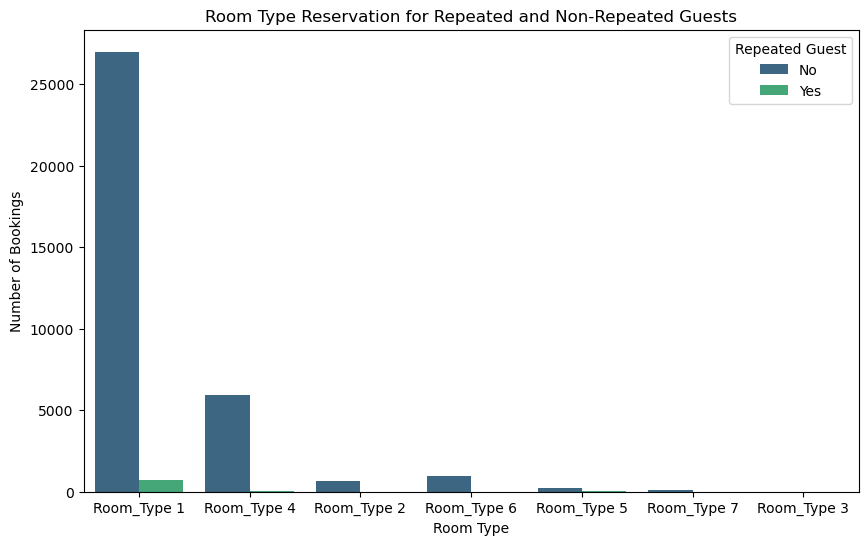

In [59]:
plt.figure(figsize=(10,6))

# Countplot for repeated_guest and room_type_reserved based on booking_status_Canceled
sns.countplot(data=hr, x='room_type_reserved', hue='repeated_guest', palette='viridis')

plt.title('Room Type Reservation for Repeated and Non-Repeated Guests')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Repeated Guest', labels=['No', 'Yes'])

plt.show()

In [60]:
# Group by 'room_type_reserved', 'market_segment_type', and 'booking_status_Canceled' and count the bookings
booking_counts = hr.groupby(['room_type_reserved', 'market_segment_type', 'booking_status_Canceled']).size().unstack()

# Fill NaN values with 0
booking_counts = booking_counts.fillna(0)

# Rename columns for clarity
booking_counts.columns = ['Not Cancelled', 'Cancelled']

print(booking_counts)

                                        Not Cancelled  Cancelled
room_type_reserved market_segment_type                          
Room_Type 1        Aviation                      45.0       15.0
                   Complementary                 26.0        0.0
                   Corporate                   1651.0      177.0
                   Offline                     6659.0     3080.0
                   Online                     10276.0     5788.0
Room_Type 2        Complementary                  1.0        0.0
                   Corporate                      2.0        0.0
                   Offline                       49.0        8.0
                   Online                       387.0      220.0
Room_Type 3        Corporate                      1.0        0.0
                   Offline                        2.0        0.0
                   Online                         0.0        2.0
Room_Type 4        Aviation                      43.0       22.0
                   Comple

In [61]:
# Group by 'room_type_reserved', 'repeated_guest', and 'booking_status_Canceled' and count the bookings
booking_counts_repeated = hr.groupby(['room_type_reserved', 'repeated_guest', 'booking_status_Canceled']).size().unstack()

# Fill NaN values with 0
booking_counts_repeated = booking_counts_repeated.fillna(0)

# Rename columns for clarity
booking_counts_repeated.columns = ['Not Cancelled', 'Cancelled']

print(booking_counts_repeated)

                                   Not Cancelled  Cancelled
room_type_reserved repeated_guest                          
Room_Type 1        0                     17940.0     9046.0
                   1                       717.0       14.0
Room_Type 2        0                       438.0      228.0
                   1                         1.0        0.0
Room_Type 3        0                         3.0        2.0
Room_Type 4        0                      3875.0     2068.0
                   1                        49.0        0.0
Room_Type 5        0                       160.0       71.0
                   1                        14.0        1.0
Room_Type 6        0                       540.0      406.0
                   1                         2.0        0.0
Room_Type 7        0                        81.0       36.0
                   1                         1.0        0.0


In [62]:
# Group by 'room_type_reserved' and 'repeated_guest', count the bookings
booking_counts_repeated = hr.groupby(['room_type_reserved', 'repeated_guest']).size()

# Calculate the total bookings for each room type
total_bookings = booking_counts_repeated.sum(level=0)

# Calculate the percentage of bookings for each room type and guest type (repeated or not)
booking_percentages_repeated = booking_counts_repeated / total_bookings * 100

# Create a DataFrame from the series
df_counts = booking_counts_repeated.reset_index(name='Counts')
df_percentages = booking_percentages_repeated.reset_index(name='Percentages')

# Merge the counts and percentages dataframes
result_df = pd.merge(df_counts, df_percentages, how='inner', on=['room_type_reserved', 'repeated_guest'])

print(result_df)

   room_type_reserved  repeated_guest  Counts  Percentages
0         Room_Type 1               0   26986    97.362629
1         Room_Type 1               1     731     2.637371
2         Room_Type 2               0     666    99.850075
3         Room_Type 2               1       1     0.149925
4         Room_Type 3               0       5   100.000000
5         Room_Type 4               0    5943    99.182243
6         Room_Type 4               1      49     0.817757
7         Room_Type 5               0     231    93.902439
8         Room_Type 5               1      15     6.097561
9         Room_Type 6               0     946    99.789030
10        Room_Type 6               1       2     0.210970
11        Room_Type 7               0     117    99.152542
12        Room_Type 7               1       1     0.847458


/var/folders/vl/q57w49ys18v2dbmv_5lg2wth0000gn/T/ipykernel_53499/1498109381.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  total_bookings = booking_counts_repeated.sum(level=0)


In [63]:
# Convert 'market_segment_type' to category if it's not already
if hr['market_segment_type'].dtype != 'category':
    hr['market_segment_type'] = hr['market_segment_type'].astype('category')

# Count of bookings for each 'room_type_reserved' and 'market_segment_type'
booking_counts = hr.groupby(['room_type_reserved', 'market_segment_type']).size().unstack(fill_value=0)

# Display the booking_counts
print(booking_counts)

market_segment_type  Aviation  Complementary  Corporate  Offline  Online
room_type_reserved                                                      
Room_Type 1                60             26       1828     9739   16064
Room_Type 2                 0              1          2       57     607
Room_Type 3                 0              0          1        2       2
Room_Type 4                65              5         99      612    5211
Room_Type 5                 0              3         73       80      90
Room_Type 6                 0              0          3       23     922
Room_Type 7                 0              1          5        5     107


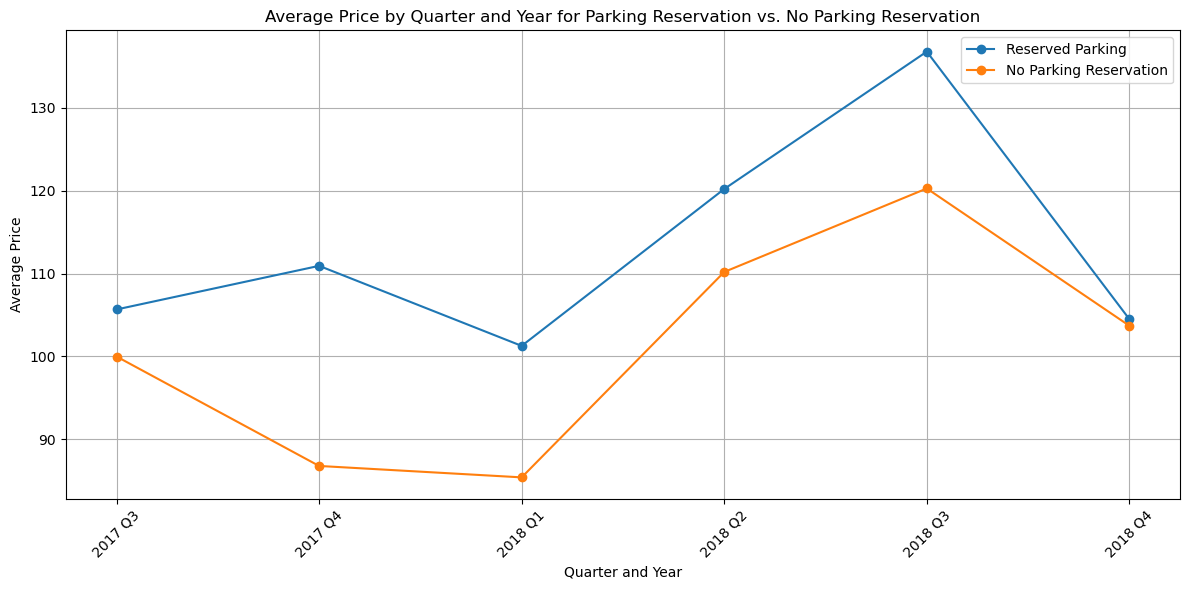

In [64]:
# Separate guests who reserved a parking spot from those who did not
reserved_parking = hr[hr['required_car_parking_space'] == 1]
no_parking_reservation = hr[hr['required_car_parking_space'] == 0]

# Group data by quarter_year and calculate average price for each group
reserved_parking_avg_price = reserved_parking.groupby('quarter_year')['avg_price_per_room'].mean()
no_parking_reservation_avg_price = no_parking_reservation.groupby('quarter_year')['avg_price_per_room'].mean()

# Plot the data
quarters_years = sorted(hr['quarter_year'].unique())  # Get unique quarters_years in ascending order
plt.figure(figsize=(12, 6))
plt.plot(quarters_years, reserved_parking_avg_price, marker='o', label='Reserved Parking')
plt.plot(quarters_years, no_parking_reservation_avg_price, marker='o', label='No Parking Reservation')
plt.xlabel('Quarter and Year')
plt.ylabel('Average Price')
plt.title('Average Price by Quarter and Year for Parking Reservation vs. No Parking Reservation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# People who want reserved parking pay more on an average as expected

# But the gap has reduced over time and in Q4 2028, they converged

# This may be a response to their consistently high cancellation rates from the hotel

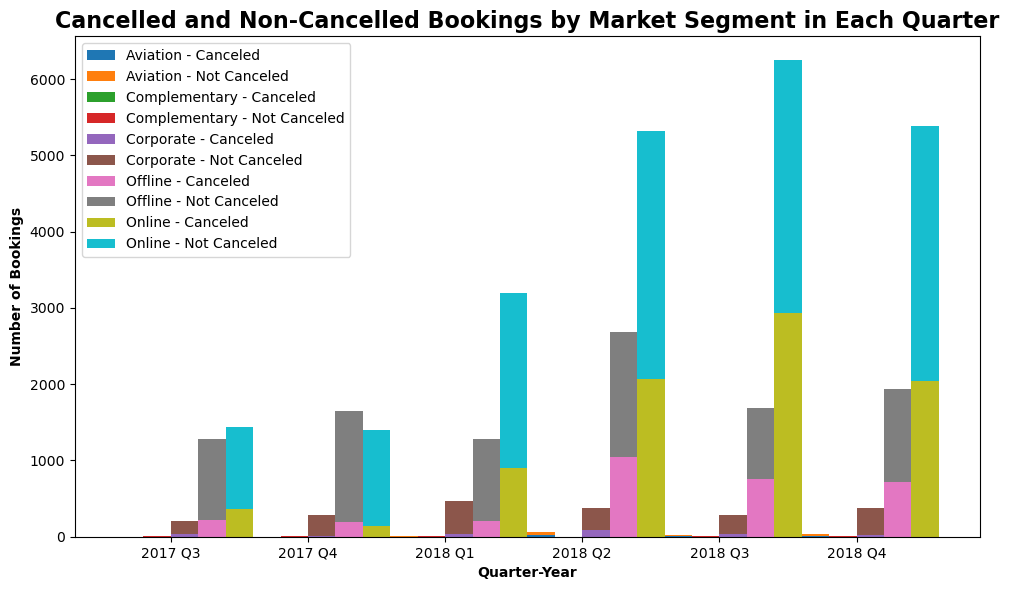

In [66]:
# Group the data by quarter and market segment
grouped_data = hr.groupby(['quarter_year', 'market_segment_type'])

# Count the number of canceled and not-canceled bookings for each group
cancelled_counts = grouped_data['booking_status_Canceled'].sum()
not_cancelled_counts = grouped_data['booking_status_Canceled'].count() - cancelled_counts

# Create a bar chart
quarters = sorted(hr['quarter_year'].unique())
market_segments = sorted(hr['market_segment_type'].unique())

width = 0.2  # Width of each bar
x = range(len(quarters))

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))
for i, market_segment in enumerate(market_segments):
    canceled_vals = [cancelled_counts.get((quarter, market_segment), 0) for quarter in quarters]
    not_cancelled_vals = [not_cancelled_counts.get((quarter, market_segment), 0) for quarter in quarters]

    ax.bar([pos + i * width for pos in x], canceled_vals, width, label=f"{market_segment} - Canceled")
    ax.bar([pos + i * width for pos in x], not_cancelled_vals, width, bottom=canceled_vals, label=f"{market_segment} - Not Canceled")

ax.set_xticks([pos + 1.5 * width for pos in x])
ax.set_xticklabels(quarters)
ax.set_xlabel("Quarter-Year",fontdict={'weight': 'bold'})
ax.set_ylabel("Number of Bookings",fontdict={'weight': 'bold'})
ax.set_title("Cancelled and Non-Cancelled Bookings by Market Segment in Each Quarter",fontdict={'weight': 'bold', 'size': 16})
ax.legend()

plt.tight_layout()
plt.show()

In [67]:
# Online bookings have skyrocketed over time

# But close to half of them get cancelled

# Knowing this hotels can comfortably overbook rooms in order to reduce the hit from last minute cancellations

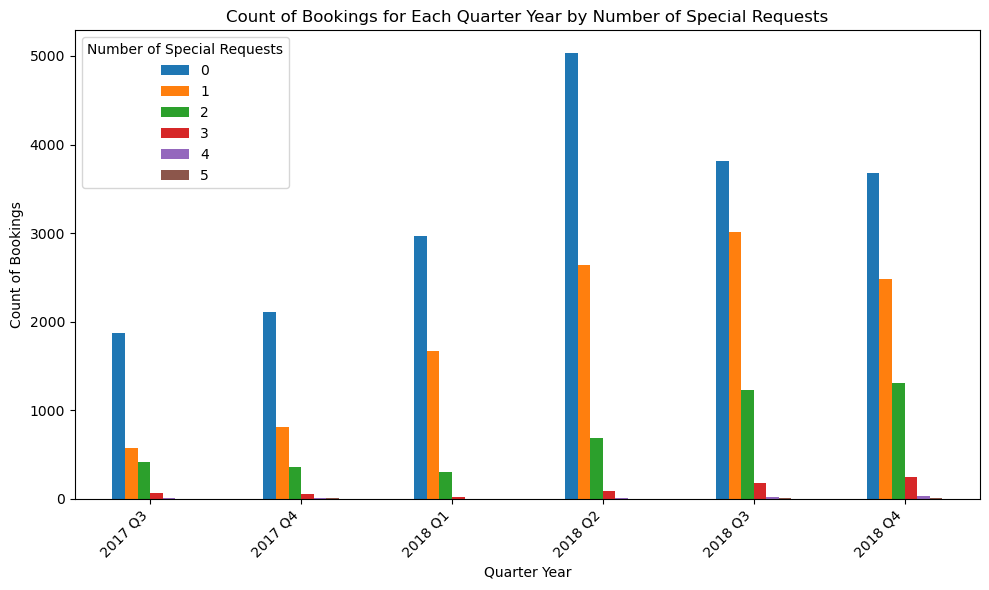

In [68]:
# Group by 'quarter_year' and 'no_of_special_requests', then calculate the count of bookings for each group
booking_counts = hr.groupby(['no_of_special_requests', 'quarter_year']).size().reset_index(name='count')

# Pivot the data to make 'no_of_special_requests' values as columns and 'quarter_year' as rows
pivot_hr = booking_counts.pivot(index='quarter_year', columns='no_of_special_requests', values='count')

# Plot the data using a bar plot
ax = pivot_hr.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Quarter Year')
ax.set_ylabel('Count of Bookings')
ax.set_title('Count of Bookings for Each Quarter Year by Number of Special Requests')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Number of Special Requests')
plt.tight_layout()
plt.show()

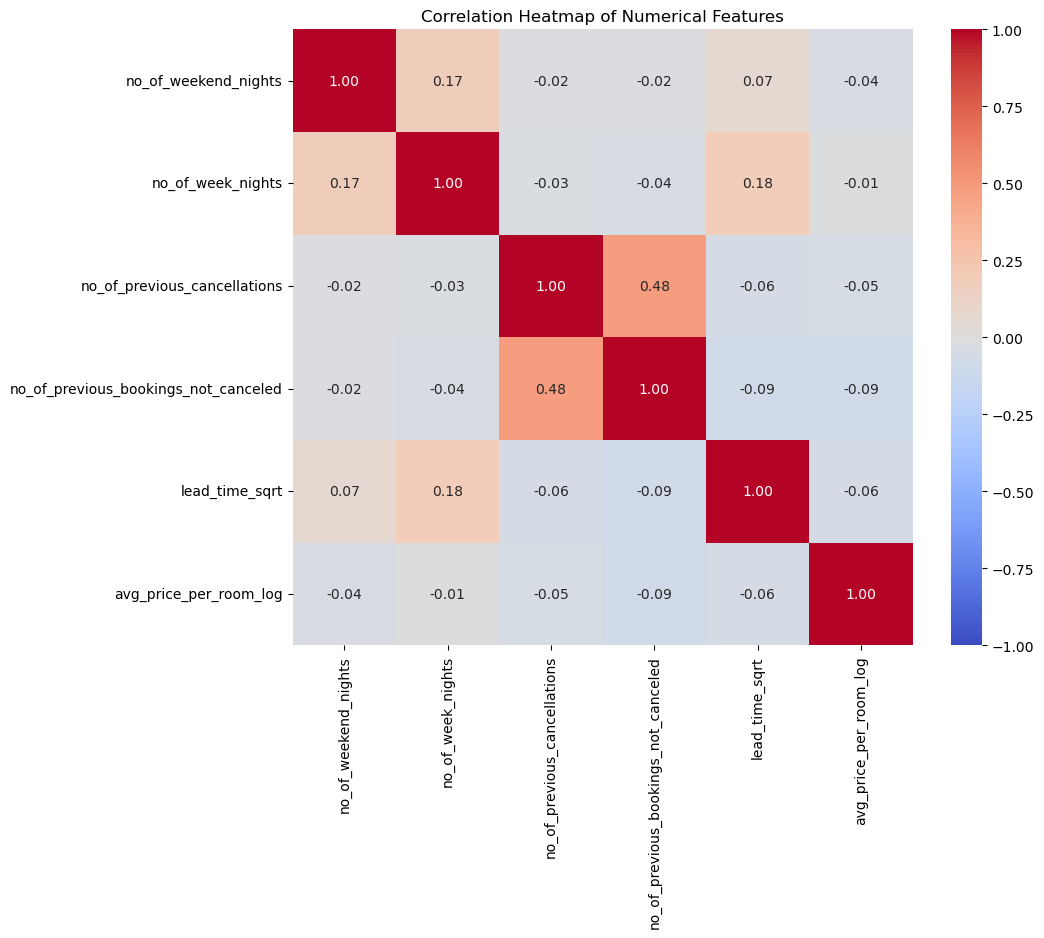

In [69]:
# Define the numerical features to analyze
numerical_features_new = ['no_of_weekend_nights', 'no_of_week_nights', 'no_of_previous_cancellations',
                         'no_of_previous_bookings_not_canceled', 'lead_time_sqrt', 'avg_price_per_room_log']

# Assuming you have a DataFrame 'hr' containing the booking data
correlation_matrix = hr[numerical_features_new].corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [52]:
# More EDA

# Model

In [76]:
# Prep data further for model
# One hot encoding the other categorical variables
hr_encoded = pd.get_dummies(hr, columns=['type_of_meal_plan', 'room_type_reserved','market_segment_type'], drop_first=True)

# Drop the original 'arrival_date_combined' column
hr_encoded.drop(columns=['arrival_date_combined','avg_price_per_room','lead_time','quarter_year'], inplace=True)
hr_encoded.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'lead_time_sqrt', 'avg_price_per_room_log',
       'no_of_previous_bookings_not_canceled_log', 'booking_status_Canceled',
       'year', 'month', 'day', 'week', 'dayofweek', 'quarter', 'dayofyear',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [77]:
# Separate the target variable from the features
X = hr_encoded.drop(columns=['booking_status_Canceled','Booking_ID'])
y = hr_encoded['booking_status_Canceled']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,lead_time_sqrt,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
18348,2,0,2,4,0,0,0,0,0,9.110434,...,0,0,0,0,0,0,0,0,1,0
5193,2,0,0,1,0,0,0,0,0,13.490738,...,0,0,0,1,0,0,0,0,0,1
22960,1,0,1,2,0,0,0,0,1,2.645751,...,0,0,0,0,0,0,0,0,0,1
7032,2,0,2,1,0,0,0,0,2,3.872983,...,0,0,0,0,0,0,0,0,0,1
24063,1,0,0,1,0,0,0,0,0,1.000000,...,0,0,0,0,0,0,0,0,0,1


## Logistic Regression

In [89]:
# Recursive Feature Elimination with Logistic Regression
logistic_model = LogisticRegression()  # Choose the model you want to use for RFE
rfe_logistic = RFE(logistic_model, n_features_to_select=5)  # Choose the desired number of features
fit_logistic = rfe_logistic.fit(X_train, y_train)

# Selected features
selected_features_logistic = X_train.columns[fit_logistic.support_]
print("Selected Features (Logistic Regression):", selected_features_logistic)

# GridSearchCV to find the best hyperparameters for Logistic Regression
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0]
}

logistic_model = LogisticRegression()
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, n_jobs=-1)
grid_search_logistic.fit(X_train[selected_features_logistic], y_train)

# Best hyperparameters for Logistic Regression
best_params_logistic = grid_search_logistic.best_params_
print("Best Hyperparameters (Logistic Regression):", best_params_logistic)

# Train the Logistic Regression model with optimized hyperparameters
best_model_logistic = LogisticRegression(**best_params_logistic)
best_model_logistic.fit(X_train[selected_features_logistic], y_train)

# Evaluate the model on the test set
y_pred_logistic = best_model_logistic.predict(X_test[selected_features_logistic])

# Calculate accuracy, precision and recall
accuracy_logistic = best_model_logistic.score(X_test[selected_features_logistic], y_test)
print("Accuracy on Test Set (Logistic Regression):", accuracy_logistic)

precision_logistic = precision_score(y_test, y_pred_logistic)
print("Precision:", precision_logistic)

recall_logistic = recall_score(y_test, y_pred_logistic)
print("Recall:", recall_logistic)

/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Selected Features (Logistic Regression): Index(['required_car_parking_space', 'repeated_guest',
       'no_of_special_requests', 'market_segment_type_Corporate',
       'market_segment_type_Offline'],
      dtype='object')
Best Hyperparameters (Logistic Regression): {'C': 0.01, 'penalty': 'l2'}
Accuracy on Test Set (Logistic Regression): 0.7348368118784143
Precision: 0.6256921373200443
Recall: 0.48146570089475926


/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/barnana/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1168, in fit
    solver = _check_

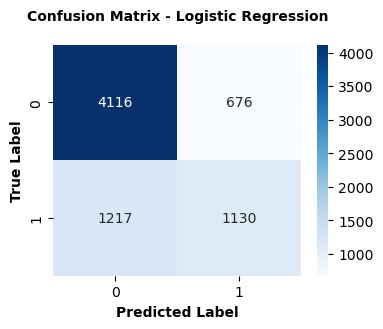

In [117]:
# Compute confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label',fontdict={'weight': 'bold'})
plt.ylabel('True Label',fontdict={'weight': 'bold'})
plt.title('Confusion Matrix - Logistic Regression\n',fontdict={'weight': 'bold', 'size': 10})
plt.show()

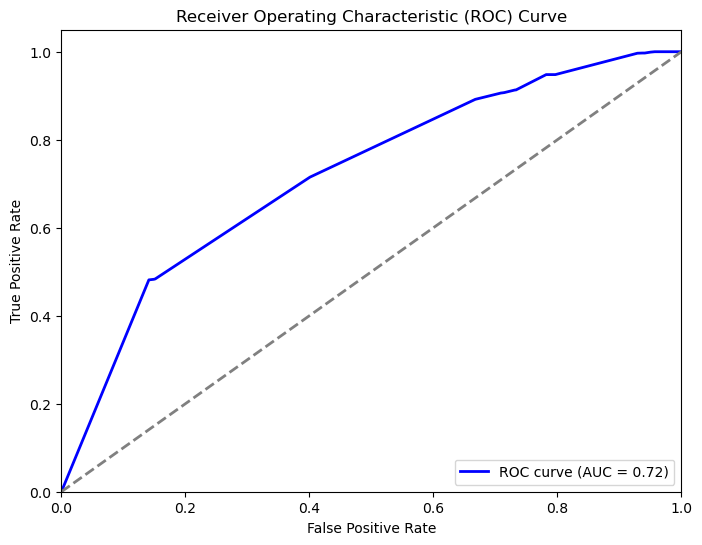

In [93]:
# Compute ROC curve and ROC AUC score
probs_logistic = best_model_logistic.predict_proba(X_test[selected_features_logistic])[:, 1]
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, probs_logistic)
roc_auc_logistic = roc_auc_score(y_test, probs_logistic)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Feature importance

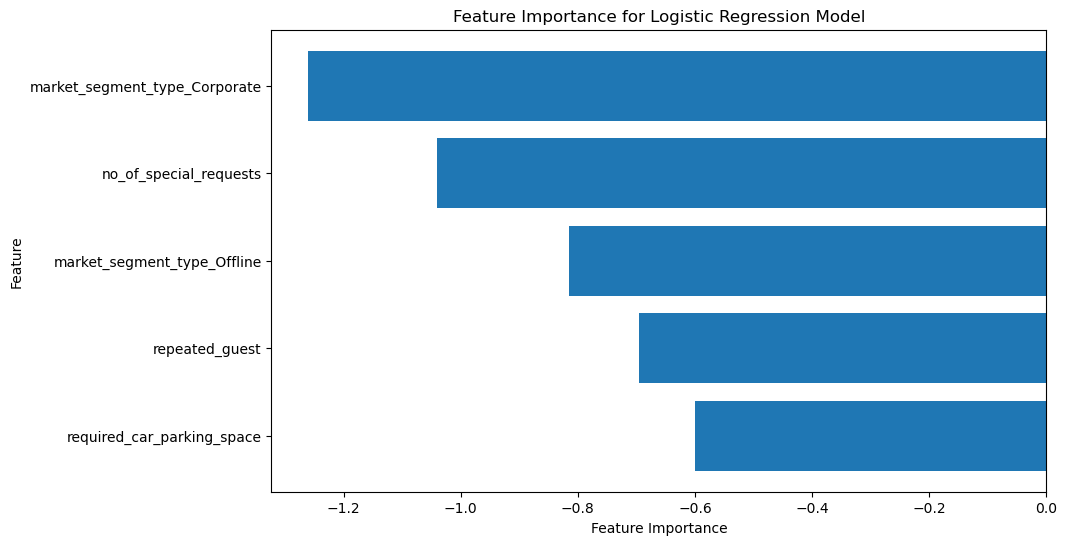

In [100]:
# Get feature importance for Logistic Regression model
feature_importance_logistic = best_model_logistic.coef_[0]
feature_importance_df_logistic = pd.DataFrame({'Feature': selected_features_logistic, 'Importance': feature_importance_logistic})
feature_importance_df_logistic = feature_importance_df_logistic.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_logistic['Feature'], feature_importance_df_logistic['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

## Random Forest

In [82]:
# Recursive Feature Elimination with Random Forest
RandomForest_model = RandomForestClassifier()  # Choose the model you want to use for RFE
rfe_RandomForest = RFE(RandomForest_model, n_features_to_select=5)  # Choose the desired number of features
fit_RandomForest = rfe_RandomForest.fit(X_train, y_train)

# Selected features
selected_features_RandomForest = X_train.columns[fit_RandomForest.support_]
print("Selected Features:", selected_features_RandomForest)

# GridSearchCV to find the best hyperparameters
param_grid_RandomForest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RandomForest_model = RandomForestClassifier()
grid_search_RandomForest = GridSearchCV(RandomForest_model, param_grid_RandomForest, cv=5, n_jobs=-1)
grid_search_RandomForest.fit(X_train[selected_features_RandomForest], y_train)

# Best hyperparameters
best_params_RandomForest = grid_search_RandomForest.best_params_
print("Best Hyperparameters:", best_params_RandomForest)

# Train the RandomForestClassifier with optimized hyperparameters
best_model_RandomForest = RandomForestClassifier(**best_params_RandomForest)
best_model_RandomForest.fit(X_train[selected_features_RandomForest], y_train)

# Evaluate the model on the test set
y_pred_RandomForest = best_model_RandomForest.predict(X_test[selected_features_RandomForest])

# Calculate accuracy, precision and recall
accuracy_RandomForest = best_model_RandomForest.score(X_test[selected_features_RandomForest], y_test)
print("Accuracy on Test Set:", accuracy_RandomForest)

precision_RandomForest = precision_score(y_test, y_pred_RandomForest)
print("Precision:", precision_RandomForest)

recall_RandomForest = recall_score(y_test, y_pred_RandomForest)
print("Recall:", recall_RandomForest)

Selected Features: Index(['no_of_special_requests', 'lead_time_sqrt', 'avg_price_per_room_log',
       'day', 'dayofyear'],
      dtype='object')
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on Test Set: 0.8883597142456927
Precision: 0.8701050620821394
Recall: 0.7763101832126118


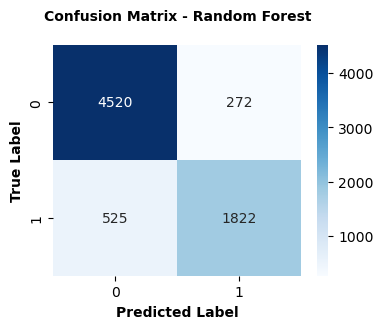

In [119]:
# Compute confusion matrix
cm_RandomForest = confusion_matrix(y_test, y_pred_RandomForest)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm_RandomForest, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label',fontdict={'weight': 'bold'})
plt.ylabel('True Label',fontdict={'weight': 'bold'})
plt.title('Confusion Matrix - Random Forest\n',fontdict={'weight': 'bold', 'size': 10})
plt.show()

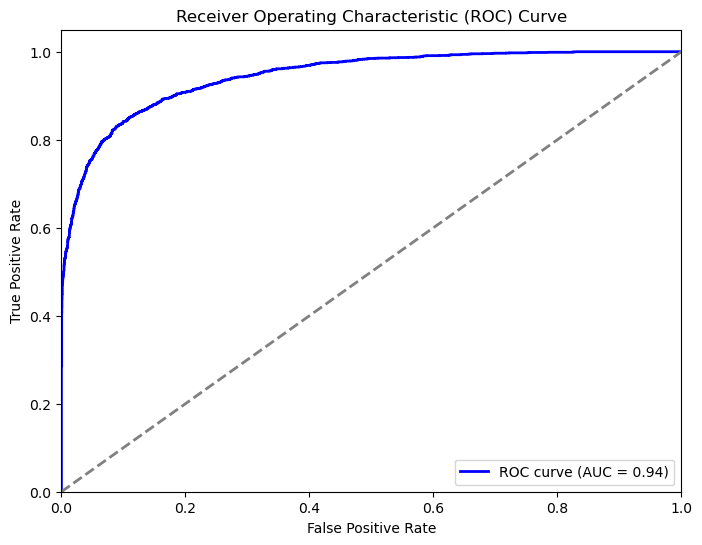

In [97]:
# Compute ROC curve and ROC AUC score
probs_RandomForest = best_model_RandomForest.predict_proba(X_test[selected_features_RandomForest])[:, 1]
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(y_test, probs_RandomForest)
roc_auc_RandomForest = roc_auc_score(y_test, probs_RandomForest)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RandomForest, tpr_RandomForest, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_RandomForest:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Feature importance

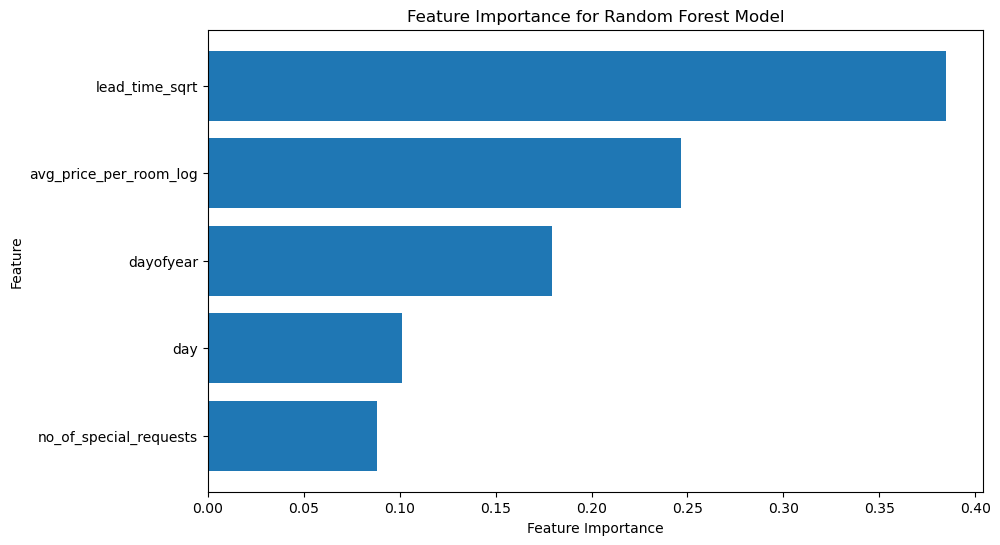

In [99]:
# Get feature importance for Random Forest model
feature_importance_randomforest = best_model_RandomForest.feature_importances_
feature_importance_df_randomforest = pd.DataFrame({'Feature': selected_features_RandomForest, 'Importance': feature_importance_randomforest})
feature_importance_df_randomforest = feature_importance_df_randomforest.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_randomforest['Feature'], feature_importance_df_randomforest['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.show()

## XGBoost

In [123]:
# Create the XGBoost model
model_xgboost = xgb.XGBClassifier()

# Initialize RFE with the XGBoost model and the desired number of features to select
rfe_xgboost = RFE(model_xgboost, n_features_to_select=10)

# Fit the RFE to the training data
fit_xgboost = rfe_xgboost.fit(X_train, y_train)

# Selected features
selected_features_xgboost = X_train.columns[fit_xgboost.support_]
print("Selected Features:", selected_features_xgboost)

# GridSearchCV to find the best hyperparameters for XGBoost
param_grid_xgboost = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.01]
}

xgb_model = xgb.XGBClassifier()
grid_search_xgboost = GridSearchCV(xgb_model, param_grid_xgboost, cv=5, n_jobs=-1)
grid_search_xgboost.fit(X_train[selected_features_xgboost], y_train)

# Best hyperparameters
best_params_xgboost = grid_search_xgboost.best_params_
print("Best Hyperparameters:", best_params_xgboost)

# Train the XGBoost model with the selected features and best hyperparameters
selected_model_xgboost = xgb.XGBClassifier(**best_params_xgboost)
selected_model_xgboost.fit(X_train[selected_features_xgboost], y_train)

# Make predictions on the test set
y_pred_xgboost = selected_model_xgboost.predict(X_test[selected_features_xgboost])

# Calculate the accuracy,precision and recall of the model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print("Accuracy on Test Set:", accuracy_xgboost)

precision_xgboost = precision_score(y_test, y_pred_xgboost)
print("Precision:", precision_xgboost)

recall_xgboost = recall_score(y_test, y_pred_xgboost)
print("Recall:", recall_xgboost)

Selected Features: Index(['no_of_adults', 'required_car_parking_space', 'repeated_guest',
       'no_of_special_requests', 'lead_time_sqrt', 'avg_price_per_room_log',
       'year', 'month', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')
Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Accuracy on Test Set: 0.886818882196386
Precision: 0.8597475455820477
Recall: 0.7835534725181083


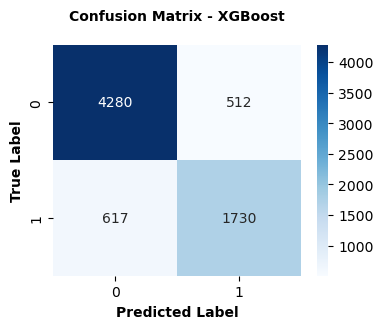

In [122]:
# Compute confusion matrix
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label',fontdict={'weight': 'bold'})
plt.ylabel('True Label',fontdict={'weight': 'bold'})
plt.title('Confusion Matrix - XGBoost\n',fontdict={'weight': 'bold', 'size': 10})
plt.show()

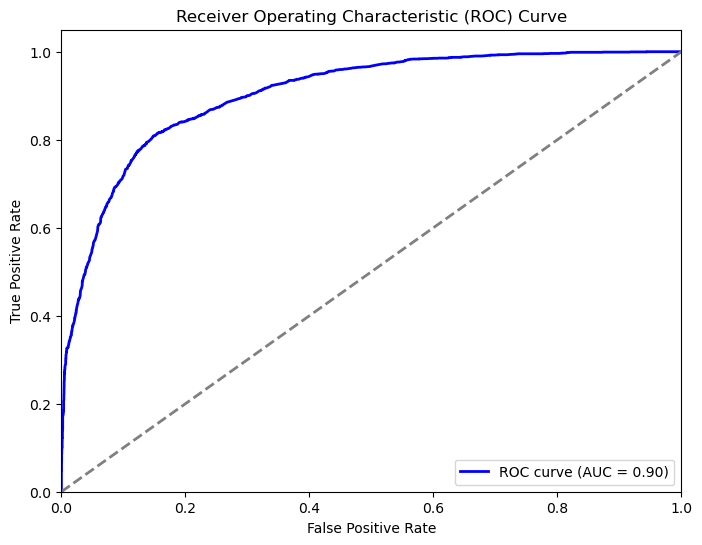

In [115]:
# Compute ROC curve and ROC AUC score
probs_xgboost = selected_model_xgboost.predict_proba(X_test[selected_features_xgboost])[:, 1]
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, probs_xgboost)
roc_auc_xgboost = roc_auc_score(y_test, probs_xgboost)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgboost, tpr_xgboost, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_xgboost:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

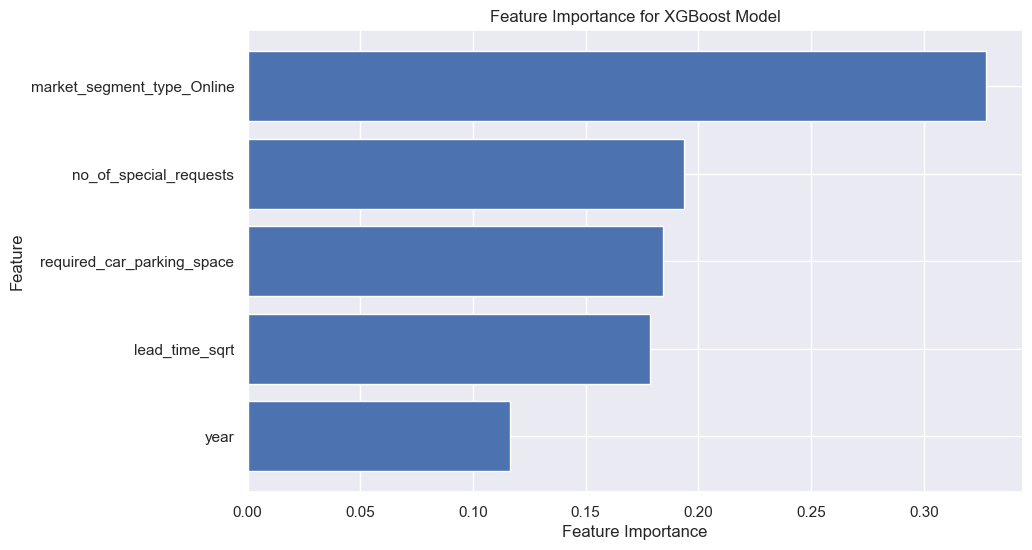

In [314]:
# Show feature importance for XGBoost model
feature_importance = selected_model_xgboost.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features_xgboost, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for XGBoost Model')
plt.show()